# CS145 Howework 6, Naive Bayes and Topic Modeling

<span style="color:red"> **Due date:** </span>
HW6 is due on **11:59 PM PT, Dec. 14 (Monday, Final Week)**. Please submit through GradeScope. 

----

## Print Out Your Name and UID

<span style="color:blue"> **Name: Kevin Li, UID: XXXXXXXXX** </span>

----

## Important Notes about HW6

* HW6, as the last homework, is optional if you choose to use the first 5 homework assignments for homework grading. We will select your highest 5 homework grades to calculate your final homework grade. 
* Since HW6 is optional, for the implementaion of Naive Bayes and pLSA, you can choose to implement the provided `.py` and `.py` file by filling in the blocks. <span style="color:red"> Alternatively, you are given the option to implement completely from scratch based on your understanding. Note that some packages with ready-to-use implementation of Naive Bayes and pLSA are not allowed. </span>

----

## Before You Start

You need to first create HW6 conda environment by the given `cs145hw6.yml` file, which provides the name and necessary packages for this tasks. If you have `conda` properly installed, you may create, activate or deactivate by the following commands:

```
conda env create -f cs145hw6.yml
conda activate hw6
conda deactivate
```
OR 

```
conda env create --name NAMEOFYOURCHOICE -f cs145hw6.yml 
conda activate NAMEOFYOURCHOICE
conda deactivate
```
To view the list of your environments, use the following command:
```
conda env list
```

More useful information about managing environments can be found [here](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html).

You may also quickly review the usage of basic Python and Numpy package, if needed in coding for matrix operations.

In this notebook, you must not delete any code cells in this notebook. If you change any code outside the blocks (such as hyperparameters) that you are allowed to edit (between `STRART/END YOUR CODE HERE`), you need to highlight these changes. You may add some additional cells to help explain your results and observations. 

In [5]:
import numpy as np
from numpy import zeros, int8, log
from pylab import random
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 8,8
import seaborn as sns; sns.set()
import re
import time
import nltk
nltk.download('punkt') 
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\likev\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Note that `seaborn` in HW6 is only used for ploting classification confusion matrix (in a "heatmap" style). If you encounter installation problem and cannot solve it, you may use alternative plot methods to show your results.

## Section 1: Naive Bayes for Text (50 points)

Naive Bayers is one generative model for text classification. In the problem, you are given a document in `dataset` folder. The original data comes from ["20 newsgroups"](http://qwone.com/~jason/20Newsgroups/). You can use the provided data files to save efforts on preprocessing.

Note: The code and dataset are under the subfolder named `nb`. 

In [34]:
### Data processing and preparation
# read train/test labels from files
train_label = pd.read_csv('./nb/dataset/train.label',names=['t'])
train_label = train_label['t'].tolist()
test_label = pd.read_csv('./nb/dataset/test.label', names=['t'])
test_label= test_label['t'].tolist()

# read train/test documents from files
train_data = open('./nb/dataset/train.data')
df_train = pd.read_csv(train_data, delimiter=' ', names=['docIdx', 'wordIdx', 'count'])
test_data = open('./nb/dataset/test.data')
df_test = pd.read_csv(test_data, delimiter=' ', names=['docIdx', 'wordIdx', 'count'])

# read vocab
vocab = open('./nb/dataset/vocabulary.txt') 
vocab_df = pd.read_csv(vocab, names = ['word']) 
vocab_df = vocab_df.reset_index() 
vocab_df['index'] = vocab_df['index'].apply(lambda x: x+1) 

# add label column to original df_train
docIdx = df_train['docIdx'].values
i = 0
new_label = []
for index in range(len(docIdx)-1):
    new_label.append(train_label[i])
    if docIdx[index] != docIdx[index+1]:
        i += 1
new_label.append(train_label[i])
df_train['classIdx'] = new_label

If you have the data prepared properly, the following line of code would return the head of the `df_train` dataframe, which is,


|  |  docIdx  |   wordIdx |  count  | classIdx |
| :---: | :---:        |    :----:   |      :---: | :---: |
| 0 | 1 | 1 | 4 | 1 |
| 1	| 1 | 2 | 2 | 1 |
| 2 | 1 | 3 | 10 | 1 |
| 3 | 1 | 4 | 4 | 1 |
| 4 | 1 | 5 | 2 | 1 |

In [35]:
# check the head of 'df_train'
print(df_train.head())

   docIdx  wordIdx  count  classIdx
0       1        1      4         1
1       1        2      2         1
2       1        3     10         1
3       1        4      4         1
4       1        5      2         1


Complete the implementation of Naive Bayes model for text classification `nbm.py`.  After that,  run `nbm_sklearn.py`,  which uses `sklearn` to implement naive bayes model for text classification. (Note that the dataset is slightly different loaded in `nbm_sklearn.py` and also you don't need to change anything in `nbm_sklearn.py` and directly run it.) 

If the implementation is correct, you can expect the results are generally close on both train set accuracy and test set accuracy.

In [36]:
from nb.nbm import NB_model

# model training
nbm = NB_model()
nbm.fit(df_train, train_label, vocab_df)

Prior Probability of each class:
1: 0.04259472890229834
2: 0.05155736977549028
3: 0.05075871860857219
4: 0.05208980388676901
5: 0.051024935664211554
6: 0.052533498979501284
7: 0.051646108794036735
8: 0.052533498979501284
9: 0.052888455053687104
10: 0.0527109770165942
11: 0.05306593309078002
12: 0.0527109770165942
13: 0.05244475996095483
14: 0.0527109770165942
15: 0.052622237998047744
16: 0.05315467210932647
17: 0.04836276510781791
18: 0.05004880646020055
19: 0.04117490460555506
20: 0.033365870973467035
Training completed!


In [11]:
# make predictions on train set to validate the model
predict_train_labels = nbm.predict(df_train)
train_acc = (np.array(train_label) == np.array(predict_train_labels)).mean()
print("Accuracy on training data by my implementation: {}".format(train_acc))

# make predictions on test data
predict_test_labels = nbm.predict(df_test)
test_acc = (np.array(test_label) == np.array(predict_test_labels)).mean()
print("Accuracy on training data by my implementation: {}".format(test_acc))

Accuracy on training data by my implementation: 0.941077291685154
Accuracy on training data by my implementation: 0.7810792804796802


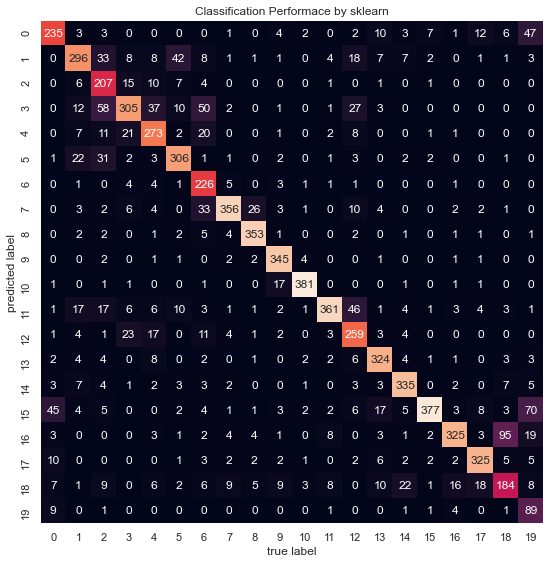

In [8]:
# plot classification matrix
mat = confusion_matrix(test_label, predict_test_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('Classification Performace by sklearn')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.tight_layout()
plt.savefig('./nb/output/nbm_mine.png')
plt.show()

<span style="color:red"> **Reminder:** </span> Do not forget to run nbm_sklearn.py to compare the results to get the accuracy and confusion matrix by sklearn implementation. You can run `python nbm_sklearn.py` under the folder path of `./hw6/nb/`.

**Question & Analysis**

0. Please indicate whether you implemented based the given code or from scratch. 

1. Report your classification accuracy on train and test documents. Also report your classification confusion matrix. Show one example document that Naive Bayes classifies incorrectly (i.e. fill in the following result table). Attach the output figure `./output/nbm_mine.png` in the jupyter book and briefly explain your observation on the accuracy and confusion matrix.

|    |   Train set accuracy |  Test set accuracy  |
| :---        |    :----:   |                ---: |
| sklearn implementaion|          |               |
| your implementaion   |          |               |

2. Show one example document that Naive Bayes classifies incorrectly by filling the following table. Provide your thought on the reason why this document is misclassified. (Note that the topic mapping is available at `train.map` same as `test.map`)

|  Words (count) in the example document  | Predicted label |  Truth label |
| :---        |    :----:   |                ---: |
| For example, student (4), education (2), ... |     Class A     |   Class B    |

3. Is Naive Bayes a generative model or discriminative model and why? What is the difference between Naive Bayes classifier and Logistic Regression? What are the pros and cons of Naive Bayes for text classification task?

4. Can you apply Naive Bayes model to identify spam emails from normal ones? Briefly explain your method (you don't need to implementation for this question).

In [76]:
lbl_map = pd.read_csv('./nb/dataset/test.map', names=['name', 'lbl'], index_col=1, sep=' ')

doc_i, lbl_hat, lbl = next((i + 1, lbl_hat, lbl) for i, (lbl_hat, lbl) in enumerate(zip(predict_test_labels, test_label)) if lbl_hat != lbl)
print(f'Document {doc_i}\nPredicted Label: [{lbl_map.loc[lbl_hat]["name"]}]\nGround Truth Label: [{lbl_map.loc[lbl]["name"]}]\n')

word_df = df_test[df_test['docIdx'] == doc_i]
word_df['names'] = vocab_df.loc[word_df['wordIdx'] - 1]['word'].to_list()
print(', '.join([f'{name} ({count})' for name, count in word_df[['names', 'count']].values]))

Document 4
Predicted Label: [soc.religion.christian]
Ground Truth Label: [alt.atheism]

atheist (1), of (20), from (1), religion (10), and (25), other (1), are (3), the (40), in (16), to (19), it (12), like (3), christians (1), on (2), but (6), with (7), word (2), is (22), people (5), can (3), get (1), for (4), who (6), go (4), directly (1), bible (1), so (2), one (3), such (1), by (3), or (4), an (1), which (4), may (1), be (13), humanism (1), secular (3), they (2), humanist (1), that (12), exists (1), all (4), any (3), well (1), this (6), example (1), anyone (1), use (1), many (2), thought (2), his (1), at (7), very (1), he (4), rather (1), than (1), although (2), often (1), had (1), some (4), god (2), when (1), faith (9), christianity (3), as (6), system (6), unfortunately (1), whose (1), premise (1), take (1), again (2), under (1), christian (9), only (2), world (1), down (1), more (1), work (1), has (3), however (1), probably (2), if (5), you (4), what (4), different (3), sure (1)

**Your Answers**

<span style="color:blue">

## 0

My implementation was based on given code

## 1

|    |   Train set accuracy |  Test set accuracy  |
| :---        |    :----:   |                ---: |
| sklearn implementaion| 0.933 | 0.774 |
| your implementaion   | 0.941 | 0.781 |

## 2

The table is above. We see that we predicted it was from the christian board, but it was truly from the atheism board. This mistake makes alot of sense - we have a bag of words based model that simply uses word frequencies. This is important for two reasons. First, any religion related boards would be expected to have similar vocabularies used on them. Second, the differentiating factor is likely the sentiment from each board (one may be pro-religion and the other may be anti-religion). However, the bag of words style of model we used does not directly understand sentiment because there is no relationship between when words are said i.e. their context.

## 3

Naive Bayes is generative because by learning both P(class) and P(words | class) instead of just P(class | words). This allows it to model the joint distribution between the words and classes.

There are several pros of using naive bayes for this task. One major pro is that it is very easy to implement and can still extract very meaningful and complex relationships. Additionally, it generalizes well to smaller test samples/unseen data as long as it has lots of data, which makes it extremely useful.

The cons to using naive bayes are that it simply cannot learn many very important pieces of information from the training data, no matter how much we give it. One clear example is the one we just gave above - it doesn't have any sentiment analysis due to the bag of words style of the model. Mathematically, we also assume that each word is generated independently from each other to simplify the model but in reality, this is untrue and we likely lose some information here as well.

</span>

----

## Section 2: Topic Modeling: Probabilistic Latent Semantic Analysis (50 points)

In this section, you will implement Probabilistic Latent Semantic Analysis (pLSA) by EM algorithm. Note: The code and dataset are under the subfolder named `plsa`. You can find two dataset files named `dataset1.txt` and `dataset2.txt` together with a [stopword](https://en.wikipedia.org/wiki/Stop_word) list as `stopwords.dic`. 

First complete the implementation of pLSA in `plsa.py`. You need to finish the E step, M step and likelihood function. Note that the optimizing process on dataset 2 might take a while. 

In [30]:
# input file, outpot files and parameters
datasetFilePath = './plsa/dataset/dataset2.txt' # or set as './plsa/dataset/dataset2.txt'
stopwordsFilePath = './plsa/dataset/stopwords.dic'
docTopicDist = './plsa/output/docTopicDistribution.txt'
topicWordDist = './plsa/output/topicWordDistribution.txt'
dictionary = './plsa/output/dictionary.dic'
topicWords = './plsa/output/topics.txt'

K = 4   # number of topic
maxIteration = 20 # maxIteration and threshold control the train process
threshold = 3
topicWordsNum = 20 # parameter for output

In [31]:
from plsa.plsa import PLSA
from plsa.utils import preprocessing

N, M, word2id, id2word, X = preprocessing(datasetFilePath, stopwordsFilePath) # data processing

In [32]:
plsa_model = PLSA()
plsa_model.initialize(N, K, M, word2id, id2word, X)

oldLoglikelihood = 1
newLoglikelihood = 1

for i in range(0, maxIteration):
    plsa_model.EStep() #implement E step
    plsa_model.MStep() #implement M step
    newLoglikelihood = plsa_model.LogLikelihood()
    print("[",time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())),"]", i+1, 
          "iteration", str(newLoglikelihood))
    # you should see increasing loglikelihood
    # if(newLoglikelihood - oldLoglikelihood < threshold):
    #     break
    oldLoglikelihood = newLoglikelihood
    
plsa_model.output(docTopicDist, topicWordDist, dictionary, topicWords, topicWordsNum)

[ 2020-12-14 22:51:32 ] 1 iteration -153235.24336666556
[ 2020-12-14 22:51:39 ] 2 iteration -151625.9443480799
[ 2020-12-14 22:51:46 ] 3 iteration -149731.17563682082
[ 2020-12-14 22:51:53 ] 4 iteration -147804.43324450118
[ 2020-12-14 22:52:00 ] 5 iteration -146137.92941717885
[ 2020-12-14 22:52:06 ] 6 iteration -144851.21438896251
[ 2020-12-14 22:52:13 ] 7 iteration -143916.6692483009
[ 2020-12-14 22:52:20 ] 8 iteration -143265.31326693555
[ 2020-12-14 22:52:26 ] 9 iteration -142810.92022156357
[ 2020-12-14 22:52:33 ] 10 iteration -142470.53495855798
[ 2020-12-14 22:52:40 ] 11 iteration -142197.38511543136
[ 2020-12-14 22:52:47 ] 12 iteration -141968.79801914512
[ 2020-12-14 22:52:53 ] 13 iteration -141776.79306485655
[ 2020-12-14 22:53:00 ] 14 iteration -141624.08864930974
[ 2020-12-14 22:53:07 ] 15 iteration -141502.51512265767
[ 2020-12-14 22:53:16 ] 16 iteration -141400.81789484975
[ 2020-12-14 22:53:26 ] 17 iteration -141317.62208512565
[ 2020-12-14 22:53:34 ] 18 iteration -1412

In [33]:
plsa_model.output(docTopicDist, topicWordDist, dictionary, topicWords, topicWordsNum)

**Question & Analysis**

0. Please indicate whether you implemented based the given code or from scratch. 
1. Choose different $K$ (number of topics) in `plsa.py`. What is your option for a reasonable $K$ in `dataset1.txt` and `dataset2.txt`? Give your results of 10 words under each topic by filling in the following table (suppose you set $K=4$). 

For dataset 1:

|  Topic 1  |   Topic 2 |  Topic 3  | Topic 4 |
| :---        |    :----:   |      :---: | :---: |
|      *your words*     |    *your words*      |       *your words*      |    *your words*   |

For dataset 2:

|  Topic 1  |   Topic 2 |  Topic 3  | Topic 4 |
| :---        |    :----:   |      :---: | :---: |
|      *your words*     |    *your words*      |       *your words*      |    *your words*   |

2. Are there any similarities between pLSA and GMM model? Briefly explain your thoughts.
3. What are the disadvantages of pLSA? Consider its generalizing ability to new unseen document and its parameter complexity, etc.

**Your Answers**

<span style="color:blue">

## 0

My implementation was based on given code

## 1

For dataset 1:

|  Topic 1  |   Topic 2 |  Topic 3  | Topic 4 |
| :---        |    :----:   |      :---: | :---: |
| luffy | luffy | island | luffy |
| devil | pirates | crew | sea |
| island | haki | manga | grand |
| fruit | piece | franky | red |
| pirates | dressrosa | government | blue |
| "" | series | pose | pirates |
| user | king | straw | burÅ« |
| crew | treasure | pirates | baroque |
| fruits | color | set | alabasta |
| sea | manga | war | piece |

For dataset 2:

|  Topic 1  |   Topic 2 |  Topic 3  | Topic 4 |
| :---        |    :----:   |      :---: | :---: |
| "" | "" | "" | "" |
| '' | '' | '' | '' |
| soviet | percent | bank | officials |
| u.s. | rose | percent | california |
| people | president | bush | people |
| official | bush | u.s. | dukakis |
| israel | rate | administration | city |
| police | government | soviet | union |
| noriega | economy | trade | barry |
| government | people | police | president |

dataset 1 only has 16 documents, so we should keep k fairly small (>5 probably)

dataset 2 has 100 documents, so depending on what we want to extract/how we want to categorize the topics, we would likely want more (e.g. 10-20)

## 2

pLSA and GMM have many similarities. One example is that for both, we train them using the EM algorithm. Another (much more important) similarity is that they are both mixture models (in GMM, we assume our distribution is a mixture of gaussian distributions and in pLSA, we assume that the distribution is based on a mixture of multinomial word distributions from topic distributions)

## 3

One disadvantage of pLSA is that the number of parameters grows linearly with respect to the number of documents (i.e. the training set size). This means that it will struggle with overfitting/will not be as good at generalizing to unseen documents.

</span>

## Bonus Questions (10 points): LDA



We've learned document and topic modeling techiques. As mentioned in the lecture, most frequently used topic models are pLSA and LDA. [Latent Dirichlet allocation (LDA)](https://ai.stanford.edu/~ang/papers/nips01-lda) proposed by David M. Blei, Andrew Y. Ng, and Michael I. Jordan, posits that each document is generated as a mixture of topics where the continuous-valued mixture proportions are distributed as a latent Dirichlet random variable.

In this question, please read the paper and/or tutorials of LDA and finish the following questions and tasks:

(1) What are the differences between pLSA and LDA? List at least one advantage of LDA over pLSA? 

(2) Show a demo of LDA with brief result analysis on any corpus and discuss what real-world applications can be supported by LDA. Note: You do not need to implement LDA algorithms from scratch. You may use multiple packages such as `nltk`, `gensim`, `pyLDAvis` (added on the `cs145hw6.yml`) to help show the demo within couple of lines of code. If you'd like to use other packages, feel free to install them.

**Your Answers**

<span style="color:blue">

## 1

One primary advantage of LDA is that it the parameter complexity is constant with respect to number of documents, meaning it isn't prone to the overfitting issues that pLSA is.
</span>

In [ ]:
import nltk
import gensim

## End of Homework 6 :)
Please printout the Jupyter notebook and relevant code files that you work on and submit only 1 PDF file on GradeScope with page assigned.